<a href="https://colab.research.google.com/github/sahil-kishor/Applied-Statistics-Project/blob/main/Final_File_Applied_Statistic_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





# **GitHub Link -**

Provide your GitHub Link here.

# **Importing Libraries and Sperstore Data Frame**

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting colab with my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# adressing the path to the superstore dataset
path = '/content/drive/MyDrive/Almabetter Projects/Applied Statistic Project/Superstore Marketing Data.xlsx'

# Reading or viewing the excel spreadsheet dataset into pandas dataframe
# 'ss' is the variable in which the dataframe is stored
ss = pd.read_excel(path)
ss.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
# Dataset Shape, Rows & Columns count and all the column names
print("Data Columns:")
print(ss.columns,'\n')

print("Dataset Shape :", ss.shape,'\n')

rows = ss.shape[0]
columns = ss.shape[1]
print(f"The total number of Rows and Columns are:\nRows : {rows}\nColumns : {columns}")

Data Columns:
Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object') 

Dataset Shape : (2240, 22) 

The total number of Rows and Columns are:
Rows : 2240
Columns : 22


In [5]:
# Superstore Dataset information
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Task 1 - Basic CleanUp**

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [6]:
# Defining a custom fuction to check the amout of Null values and Duplicate values
def superstoreinfo():
  temp=pd.DataFrame(index=ss.columns)   # Making the Columns as the Index
  temp["Datatype"]=ss.dtypes
  temp["Not-Null values"]=ss.count()
  temp["Null value"]=ss.isnull().sum()
  temp["Percentage of the null value"] = (ss.isnull().mean() * 100).round(2)
  temp["Duplicate Values"] = (ss.duplicated().sum())
  temp["Percentage of the Duplicate Value"] = (ss.duplicated().mean() * 100).round(2)
  return temp
superstoreinfo()

,Datatype,Not-Null values,Null value,Percentage of the null value,Duplicate Values,Percentage of the Duplicate Value
Id,int64,2240,0,0.00,0,0.0
Year_Birth,int64,2240,0,0.00,0,0.0
Education,object,2240,0,0.00,0,0.0
Marital_Status,object,2240,0,0.00,0,0.0
Income,float64,2216,24,1.07,0,0.0
Kidhome,int64,2240,0,0.00,0,0.0
Teenhome,int64,2240,0,0.00,0,0.0
Dt_Customer,object,2240,0,0.00,0,0.0
Recency,int64,2240,0,0.00,0,0.0
MntWines,int64,2240,0,0.00,0,0.0


Findings:



*   Only the income columns contain some null values, which is just 1.7% of the data which can be imputed with mean or median
*   There are no Duplicate Values in the dataset.



In [7]:
# Mean Imputation on the Income column
# Finding the mean of the Income column
mean_income = ss['Income'].mean().round(2)
print(f"Mean of the Income Column is : {mean_income}")

Mean of the Income Column is : 52247.25


In [8]:
# Filling the Na Values with mean
ss['Income'].fillna(mean_income, inplace = True)

print("Cleaned and Preprocessed Dataset:")
ss.head()

Cleaned and Preprocessed Dataset:


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [9]:
# Display the summary statistics DataFrame
summary_stats = ss.describe()
summary_stats

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251339,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [10]:
# Data Quality Check after removing the null values
def superstoreinfo():
  temp=pd.DataFrame(index=ss.columns)   # Making the Columns as the Index
  temp["Datatype"]=ss.dtypes
  temp["Not-Null values"]=ss.count()
  temp["Null value"]=ss.isnull().sum()
  temp["Percentage of the null value"] = (ss.isnull().mean() * 100).round(2)
  temp["Duplicate Values"] = (ss.duplicated().sum())
  temp["Percentage of the Duplicate Value"] = (ss.duplicated().mean() * 100).round(2)
  return temp
superstoreinfo()

,Datatype,Not-Null values,Null value,Percentage of the null value,Duplicate Values,Percentage of the Duplicate Value
Id,int64,2240,0,0.0,0,0.0
Year_Birth,int64,2240,0,0.0,0,0.0
Education,object,2240,0,0.0,0,0.0
Marital_Status,object,2240,0,0.0,0,0.0
Income,float64,2240,0,0.0,0,0.0
Kidhome,int64,2240,0,0.0,0,0.0
Teenhome,int64,2240,0,0.0,0,0.0
Dt_Customer,object,2240,0,0.0,0,0.0
Recency,int64,2240,0,0.0,0,0.0
MntWines,int64,2240,0,0.0,0,0.0


In [11]:
# Dristibution of Income and Age

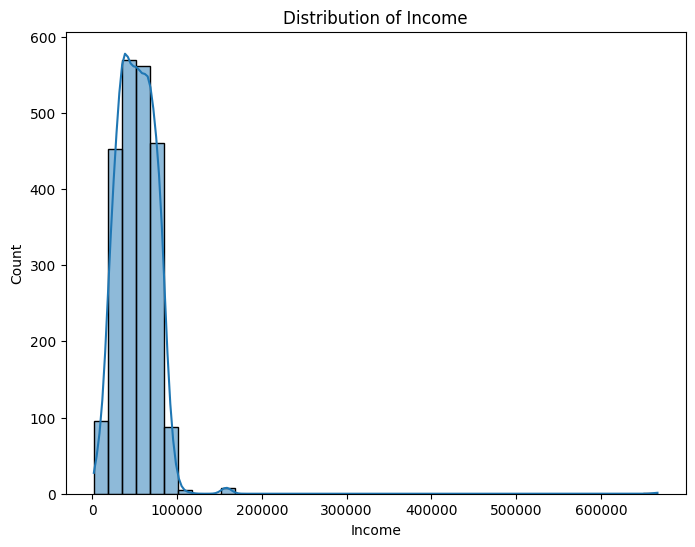

In [12]:
# Distribution Of Income
plt.figure(figsize=(8, 6))
sns.histplot(ss['Income'],bins = 40, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.show()


Findings:
  Majority of the Income of the customer Falls within the range of 100000.

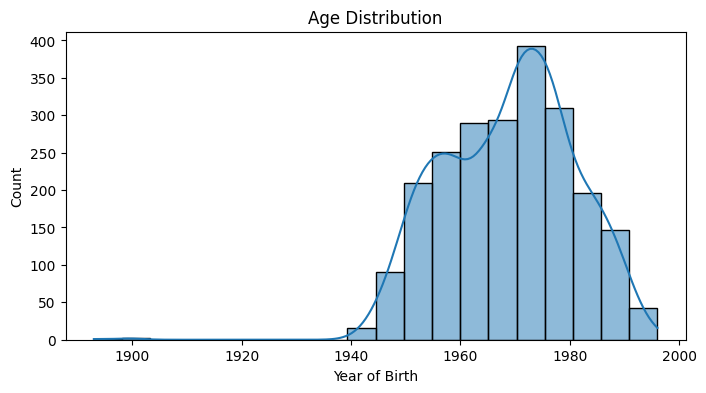

In [13]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(ss['Year_Birth'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.show()

Findings:
  Customers visiting in the store are born between the year 1940 to 2000.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [14]:
# Descriptive Statistics

# Defining the Key Variables/Columns on which the Statistics functions are to be Performed
key_variable = ['Income','Recency','Kidhome','Teenhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']
# Displaying all the Column names
values = pd.DataFrame(key_variable, columns=['Key Variables'])
values

,Key Variables
0,Income
1,Recency
2,Kidhome
3,Teenhome
4,MntWines
5,MntFruits
6,MntMeatProducts
7,MntFishProducts
8,NumDealsPurchases
9,MntGoldProds


## **Calculate Measures of Central Tendency**

*    Mean
*   Median
*    Mode



In [16]:
# 1 : Mean

mean = ss[key_variable].mean().round(2)
mean_values = pd.DataFrame(mean, columns=['Mean'])
print(f'Median of Key Variables are:\n\n')
mean_values

Median of Key Variables are:




,Mean
Income,52247.25
Recency,49.11
Kidhome,0.44
Teenhome,0.51
MntWines,303.94
MntFruits,26.30
MntMeatProducts,166.95
MntFishProducts,37.53
NumDealsPurchases,2.33
MntGoldProds,44.02


In [17]:
# 2. : Median
median = ss[key_variable].median().round(2)
median_values = pd.DataFrame(median, columns=['Median'])
print(f'Median of Key Variables are:\n\n')
median_values

Median of Key Variables are:




,Median
Income,51741.5
Recency,49.0
Kidhome,0.0
Teenhome,0.0
MntWines,173.5
MntFruits,8.0
MntMeatProducts,67.0
MntFishProducts,12.0
NumDealsPurchases,2.0
MntGoldProds,24.0


In [18]:
# 3. : Mode
# Calculate the mode of the key values
mode_values = ss[key_variable].mode()

# Create a DataFrame from the mode values
mode_df = pd.DataFrame(mode_values)

# Print the DataFrame
print("Mode of key variables of datasets are:\n ")
mode_df.transpose()

Mode of key variables of datasets are:
 


,0
Income,52247.25
Recency,56.00
Kidhome,0.00
Teenhome,0.00
MntWines,2.00
MntFruits,0.00
MntMeatProducts,7.00
MntFishProducts,0.00
NumDealsPurchases,1.00
MntGoldProds,1.00


## **Measures of dispersion for key variables**

*   Variance
*   Standard Deviation




In [20]:
# 1. variance
variance = ss[key_variable].var()
variance_values = pd.DataFrame(variance, columns=['Variance'])
print(f'Variance of Key Variables are:\n\n')
variance_values

Variance of Key Variables are:




,Variance
Income,6.268913e+08
Recency,8.388237e+02
Kidhome,2.898725e-01
Teenhome,2.965219e-01
MntWines,1.132978e+05
MntFruits,1.581926e+03
MntMeatProducts,5.094743e+04
MntFishProducts,2.984325e+03
NumDealsPurchases,3.733542e+00
MntGoldProds,2.721442e+03


In [21]:
# 2. standard deviation
std_dev = ss[key_variable].std()
std_values = pd.DataFrame(std_dev, columns=['Standard Deviation'])
print(f'Standard Deviation of Key Variables are:\n\n')
std_values

Standard Deviation of Key Variables are:




,Standard Deviation
Income,25037.797168
Recency,28.962453
Kidhome,0.538398
Teenhome,0.544538
MntWines,336.597393
MntFruits,39.773434
MntMeatProducts,225.715373
MntFishProducts,54.628979
NumDealsPurchases,1.932238
MntGoldProds,52.167439


## **Identifying Outliers**


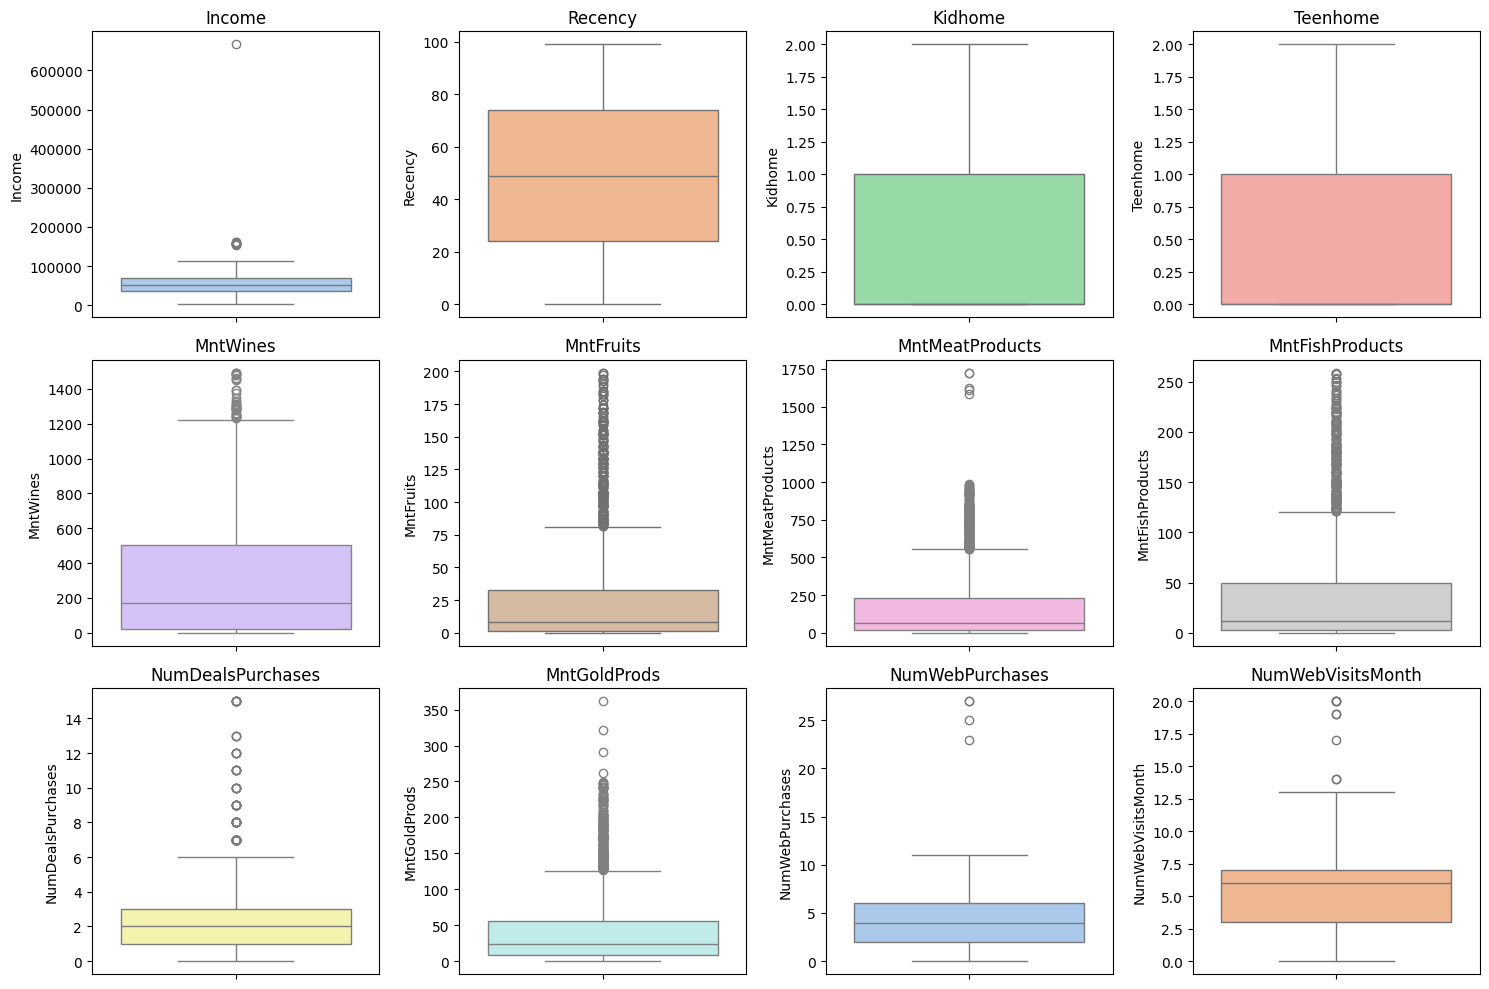

In [23]:
# Create boxplots for key variables for outlier detection
# Define the layout of subplots
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define color palette
colors = sns.color_palette('pastel')

# Plot boxplots
for i, variable in enumerate(key_variable):
    sns.boxplot(y=ss[variable], ax=axes[i],palette=[colors[i % len(colors)]])
    axes[i].set_title(variable)

# Hide empty subplots if there are fewer plots than axes
for i in range(len(key_variable), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **Insights:**


*   Recency, Kidhome, Teenhome are the only one with no specific outliers.
*   Income, NumWebPurchases and NumWebVisistsMonth have some identifiable otliers but are very few in numbers
*   Rest of the products and NumDealsPurchases have the maximum number if outliers



## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [24]:
 # Probability Distributions

In [25]:
total_purchases = ss[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
purchase = total_purchases.mean() / total_purchases.max()
expected_purchases = total_purchases.mean()

In [26]:
mu_income, sigma_income = ss['Income'].mean(), ss['Income'].std()
prob_income_gt_70000 = 1 - norm.cdf(70000, mu_income, sigma_income)
expected_income = mu_income + sigma_income * norm.ppf(prob_income_gt_70000)

print("Probability Distributions and Calculated Values:")
print(f"Total Purchases:")
print(f"   Probability of a purchase: {purchase:.4f}")
print(f"   Expected number of purchases: {expected_purchases:.2f}")

print(f"\nIncome:")
print(f"   Probability of income > $70,000: {prob_income_gt_70000:.4f}")
print(f"   Expected income: {expected_income:.2f}")


Probability Distributions and Calculated Values:
Total Purchases:
   Probability of a purchase: 0.3378
   Expected number of purchases: 14.86

Income:
   Probability of income > $70,000: 0.2392
   Expected income: 34494.50


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

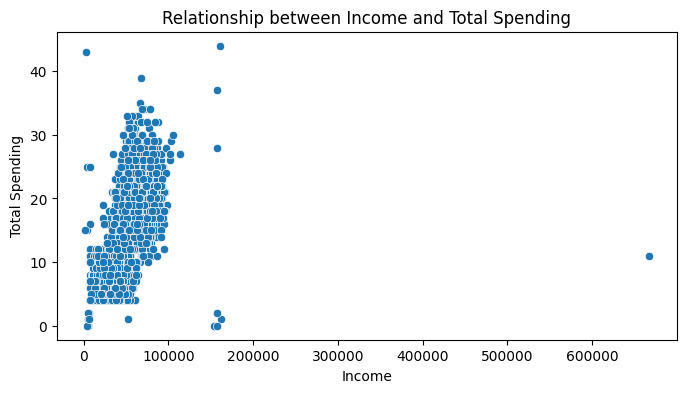

In [27]:
ss['TotalSpend'] = ss[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='TotalSpend', data=ss)
plt.title('Relationship between Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

In [28]:
# Correlation Heatmap
# Calculate correlation matrix
correlation_matrix = ss.corr()
correlation_matrix

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpend
Id,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,0.033883,-0.023834
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325,-0.030128,-0.168304
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,0.132756,-0.027223,0.563370
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207,-0.477895
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138,0.133163
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231,0.005740
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007,0.712789
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166,0.455461
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483,0.554229
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953,0.469454


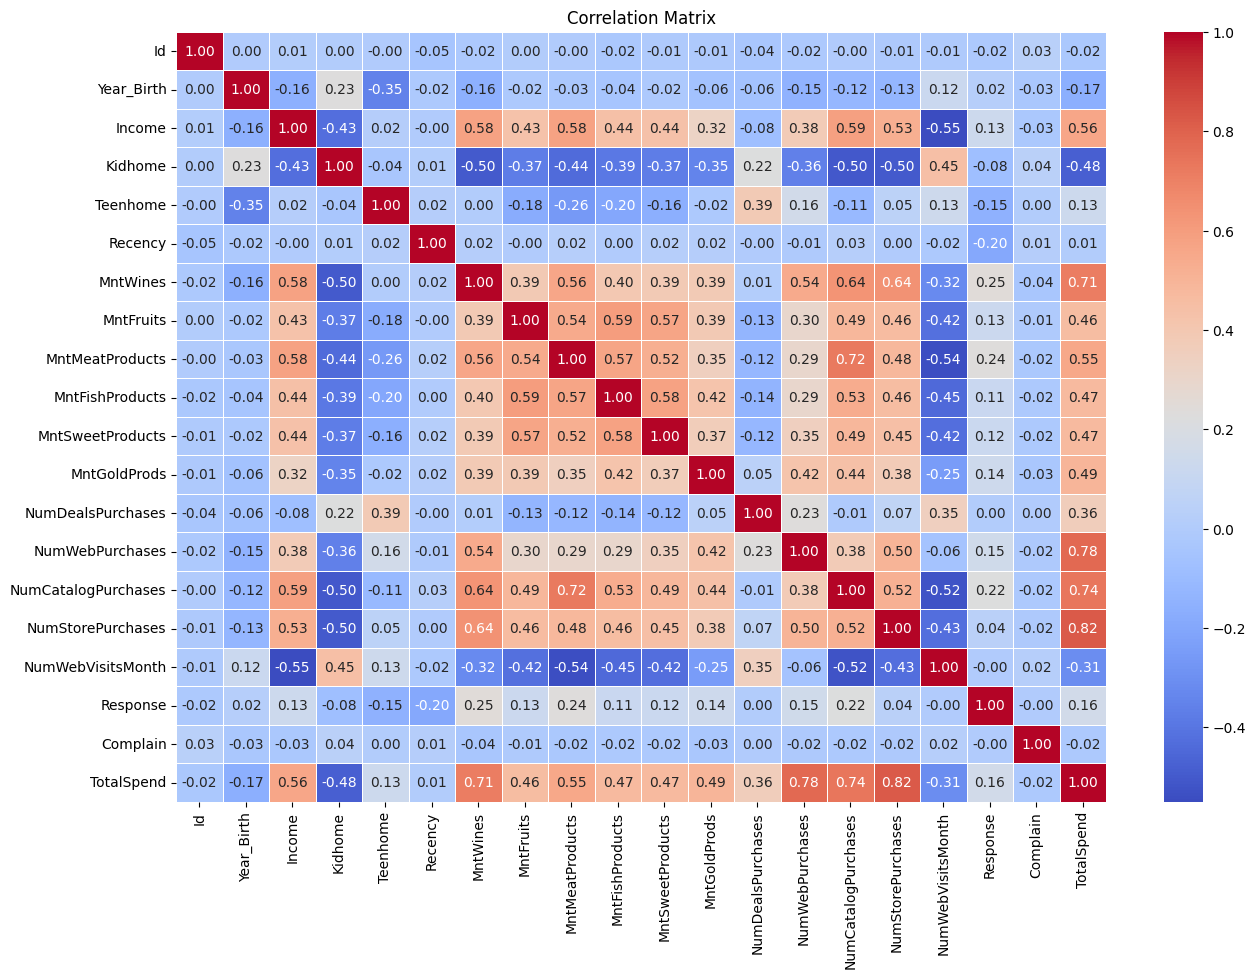

In [29]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

# Education-Based Insights

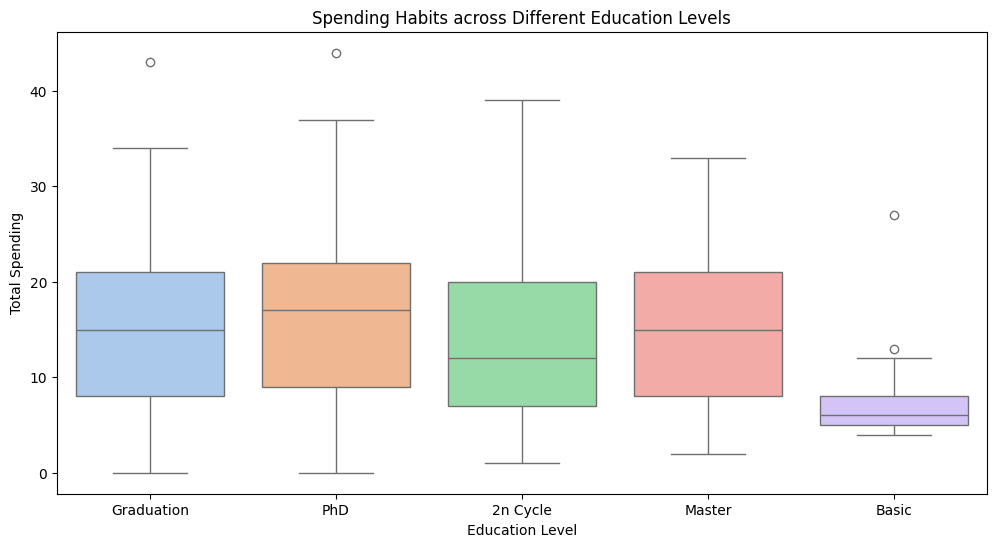

In [31]:
# Box Plot
plt.figure(figsize=(12, 6))
color = sns.color_palette('pastel')
sns.boxplot(x='Education', y='TotalSpend', data=ss, palette=colors)
plt.title('Spending Habits across Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()

### **Conclusion:**

**Insight**: Customers with a 'PhD' education level exhibit higher spending on
average.

**Recommendation**: Tailor marketing messages and offers to appeal to customers with a higher education level.

---



# Marital Status-Based Insights

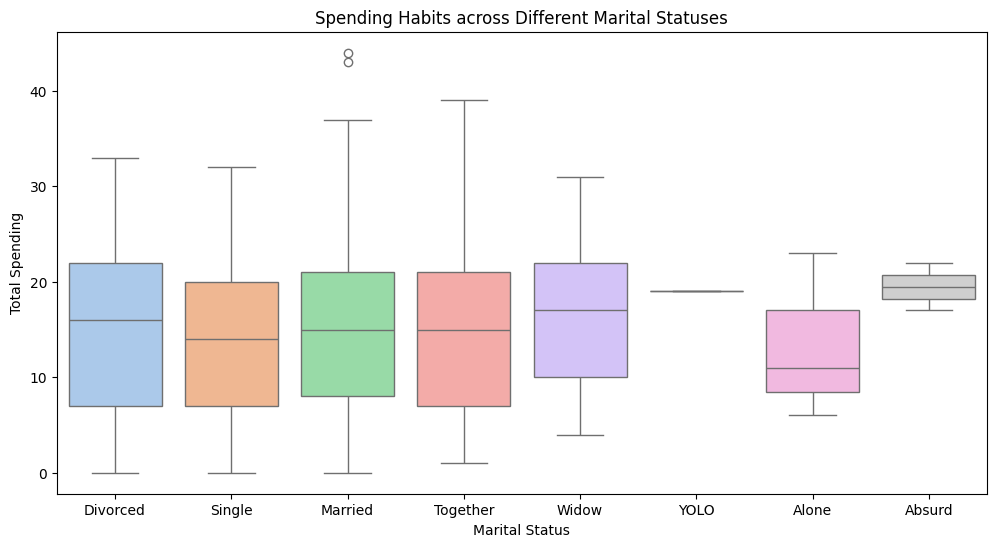

In [32]:
# Box Plot
plt.figure(figsize=(12, 6))
color = sns.color_palette('pastel')
sns.boxplot(x='Marital_Status', y='TotalSpend', data=ss, palette=colors)
plt.title('Spending Habits across Different Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.show()

### **Conclusion:**

**Insight**: Divorced & widow customers tend to have higher spending compared to other marital statuses.

**Recommendation**: Develop promotions or loyalty programs targeting married customers to enhance their engagement and spending.

---



In [34]:
# Inserting 2 new columns in the superstore dataframe to Group the income of individual customers,
# which will help us to plot and find which customers are spending more.

# Calculate percentiles
percentiles = ss['Income'].quantile([0.2, 0.4, 0.6, 0.8])

# Assign income groups and upper/lower limits
def assign_income_group(income):
    if income <= percentiles.iloc[0]:
        return 'Group 1', f'<= {percentiles.iloc[0]:.2f}'
    elif income <= percentiles.iloc[1]:
        return 'Group 2', f'{percentiles.iloc[0]:.2f} - {percentiles.iloc[1]:.2f}'
    elif income <= percentiles.iloc[2]:
        return 'Group 3', f'{percentiles.iloc[1]:.2f} - {percentiles.iloc[2]:.2f}'
    elif income <= percentiles.iloc[3]:
        return 'Group 4', f'{percentiles.iloc[2]:.2f} - {percentiles.iloc[3]:.2f}'
    else:
        return 'Group 5', f'>= {percentiles.iloc[3]:.2f}'

# Apply function to create new columns
ss['Income Group'], ss['Income Range'] = zip(*ss['Income'].apply(assign_income_group))

# If you want to see a summary of the groups
group_summary = ss.groupby('Income Group').size()
print(group_summary)

# If you want to see the first few rows of the dataset with the new columns
ss.head()


Income Group
Group 1    448
Group 2    448
Group 3    448
Group 4    448
Group 5    448
dtype: int64


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TotalSpend,Income Group,Income Range
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,1,4,4,6,1,1,0,15,Group 5,>= 71634.80
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,1,7,3,7,5,1,0,18,Group 3,44944.20 - 58169.60
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,1,3,2,5,2,0,0,11,Group 4,58169.60 - 71634.80
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,1,1,0,2,7,0,0,4,Group 2,32230.00 - 44944.20
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,2,3,1,2,7,1,0,8,Group 1,<= 32230.00


**Insights:**
1. The income of the customers have been grouped into 5 Different groups.
2. Group 1 to 5, with each Group containing equal Distribution of coustomers, 448.
3. Now we can plot a graph to find out the spending habbit of each group group of income with the salary range of every group

In [46]:
# Income Range and its Distribution among the superstore dataset Income Column.
# Create DataFrame showing value counts of 'Income Range'
income_range = pd.DataFrame(ss['Income Range'].value_counts())

# Rename index and column
income_range.reset_index(inplace=True)
income_range.columns = ['Income Range', 'Distribution']

income_range

,Income Range,Distribution
0,>= 71634.80,448
1,44944.20 - 58169.60,448
2,58169.60 - 71634.80,448
3,32230.00 - 44944.20,448
4,<= 32230.00,448


**Insights:**

The Income range of the Customers are calculated as:
1. With the lowest incomes is Group 1 with salary range less than 32,230
2. Group 2 with salary range between 32,230 and 44,944
3. Group 3 with salary range between 44,944 and 58,169
4. Group 4 with salary range between 58,169 and 71,634. Ehich is the 2nd Highest salary range.
5. Then, the group with highest salary range, Group 5, ranging above 71,634.

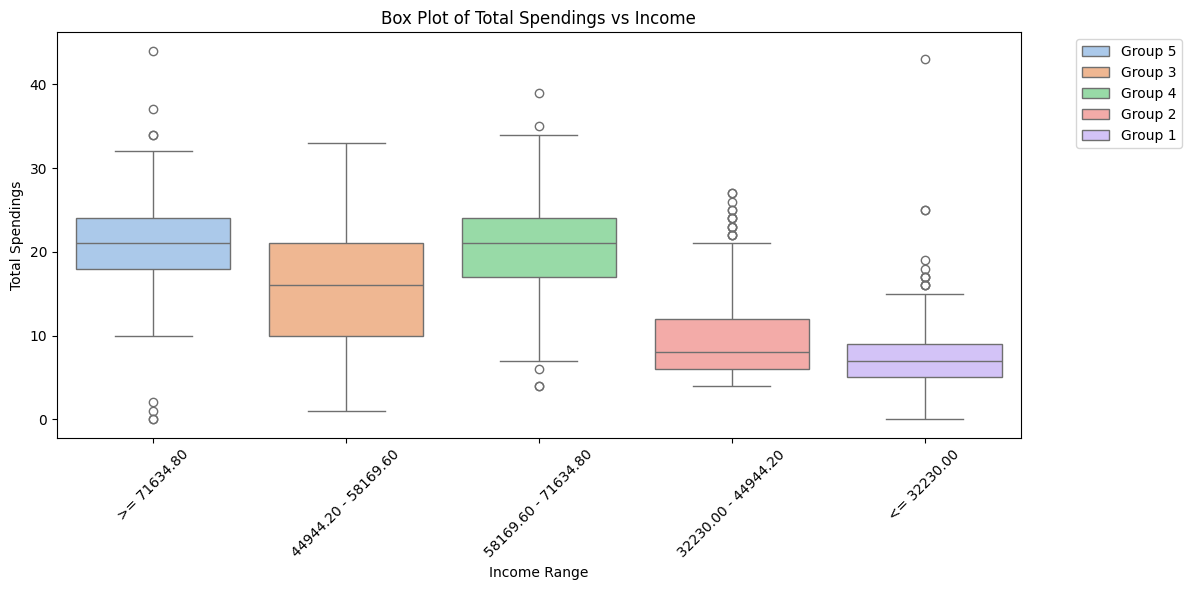

In [40]:
# Box Plot for income vs total spendings.

# Define the color palette
palette = sns.color_palette('pastel')

# Define the plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income Range', y='TotalSpend', hue='Income Group', data=ss, palette=palette)

# Adjust plot labels and title
plt.xlabel('Income Range')
plt.ylabel('Total Spendings')
plt.title('Box Plot of Total Spendings vs Income')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## **Conclusion:**

**Insight**: Customers belonging to Group 5 and Group 4 are spending more of their income but, Group 3 is having the maximum spending range, That means they are contributing more to the superstore sales

**Recommendation**: Personalized marketing campaings can me used to give these customers more benefits and discounts so that they spend more in quantity, which will increase sales quantity.



---

